In [1]:
import os
from os.path import join
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter 

# Supersense categories 

In [2]:
texts = ['Emma', 
         'Northanger_Abbey',
         'Persuasion',
         'Mansfield_Park',
         'Pride_and_Prejudice',
         'Sense_and_Sensibility']

In [3]:
all_categories = Counter()
tokens_novels = dict()

for text in texts:
    print(text)
    
    entities = pd.read_csv( join('Data',f'{text.lower()}.supersense') , sep = '\t')
    all_categories.update(entities['supersense_category'].tolist())

    tokens = pd.read_csv( join('Data',f'{text.lower()}.tokens') , sep = '\t')
    nr_tokens = tokens['token_ID_within_document'].iloc[-1]
    tokens_novels[text] = nr_tokens 

Emma
Northanger_Abbey
Persuasion
Mansfield_Park
Pride_and_Prejudice
Sense_and_Sensibility


In [4]:
print('The novels contain the following categories:')
for category,count in all_categories.most_common():
    print( f"{category} ({count})")

The novels contain the following categories:
noun.person (35552)
verb.stative (26010)
verb.communication (18947)
verb.cognition (13681)
noun.communication (11412)
noun.cognition (9705)
noun.attribute (9115)
verb.social (8378)
noun.feeling (8030)
noun.act (7808)
verb.motion (7525)
noun.time (7487)
noun.artifact (6996)
verb.perception (6812)
verb.emotion (6769)
noun.state (6638)
verb.possession (6532)
verb.change (5363)
noun.location (5038)
noun.group (3147)
noun.quantity (2443)
verb.contact (2324)
noun.body (2067)
noun.event (1858)
verb.creation (1700)
verb.body (1250)
noun.possession (1173)
verb.consumption (931)
noun.Tops (914)
noun.food (694)
noun.relation (677)
noun.object (642)
noun.phenomenon (545)
noun.substance (395)
noun.animal (377)
noun.motive (315)
noun.plant (240)
verb.competition (235)
noun.process (54)
verb.weather (47)
noun.shape (30)


In [5]:
def analyse_categories(query,label):

    rows = []

    for text in texts:
        row = []
        print(f'\n\n{text}', end = '\n\n')
        count_categories = Counter()
        data = pd.read_csv( join('Data',f'{text.lower()}.supersense') , sep = '\t')
        data_category = data.query( query )
        for word in data_category['text'].unique():
            print(word, end = '; ')
        row.extend( [text,data_category.shape[0],tokens_novels[text]] )  
        rows.append(row)
        
    
    df = pd.DataFrame( rows , columns = ['text','words_in_category','nr_tokens'] )
    df['percentage'] = df['words_in_category'] / df['nr_tokens']
    
    x_axis = 'text'
    y_axis = 'percentage'


    fig = plt.figure( figsize=( 10 , 5 ) )
    graph = sns.barplot( data=df , x=x_axis, y=y_axis, dodge=False , color = '#114496')
    graph.set_xlabel('Title' , size = 14) 
    graph.set_ylabel( label , size = 14 )

    plt.show()


def unique_words(query):
    for text in texts:
        print(f'\n\n{text}', end = '\n\n')
        count_categories = Counter()
        data = pd.read_csv( join('Data',f'{text.lower()}.supersense') , sep = '\t')
        data_category = data.query(query)
        words = list(data_category['text'].unique())
        words = [word.lower() for word in words]

        #print(words)


        for other_text in texts:
            if other_text != text:
                data_other = pd.read_csv( join('Data',f'{other_text.lower()}.supersense') , sep = '\t')
                data_other_category = data_other.query(query)
                for word in data_other_category['text'].unique():
                    if word.lower() in words:
                        #print(word)
                        words.remove(word.lower())

        print(words)

    

## Emotion



Emma

distress; vex; affection; temper; liked; enjoyments; Sorrow; sorrow; grief; cheer; satisfaction; wished; gratitude; pleasure; bear; loved; friendliness; struggled; hating; compassion; feel; thoughts; wish; humours; comfort; hoped; regrets; catch cold; wanted; joy; feeling; hope; please; loves; like; faults; willing; want; miss; smiles; pain; amusement; blessed; pity; concerns; deserves; shame; Invite; surprized; pride; offend; mortification; love; anger; relieved; care for; reluctance; felt; longed; wishes; shaken; excite; apprehension; caprice; concern; regret; missed; spirits; enjoyment; taken by; alleviation; teased; pains; horror; preferred; fancied; regard; liking; enjoyed; favour; frighten; hate; vanity; delighted; interest; dreaded; admired; struck; pushing; deference; impressed; deserve; feelings; welcomed; grieve; approbation; happiness; panic; intimacy; inviting; privileges; conceit; desiring; attachment; sentiment; satisfied; comforts; encouraged; amused; enjoying; e

captivate; benefited; pride; wish; desire; feelings; temper; bitterness; cherish; resentment; despondence; longed; wanting; benevolence; love; frightened; expecting; feel; hate; want; sensations; fancied; solicitude; care; affection; projecting; surprise; distract; hope; fear; tease; depressing; spirits; regaled; disgust; needed; taking; good humour; embarrassment; loss; awe; shyness; indifference; longing; gratitude; comfort; sorrows; sulkiness; hold; disheartened; awed; looks; mortified; abashed; sunk; console; terror; overcome; shame; sobs; grievance; wanted; distress; like; miss; goodwill; felt; kindness; delighted; delight; timidity; pain; fears; rusticities; awkwardnesses; pleasures; merriment; enjoyment; satisfaction; pity; emulation; cares; inconvenience; favour; attachment; ill; anxiety; uneasiness; complacency; mirth; diffidence; consolation; apprehension; fondness; charmed; loved; consoled; impress; sorrow; disappoint; disliked; wishing; praise; pleasure; interests; dread; t

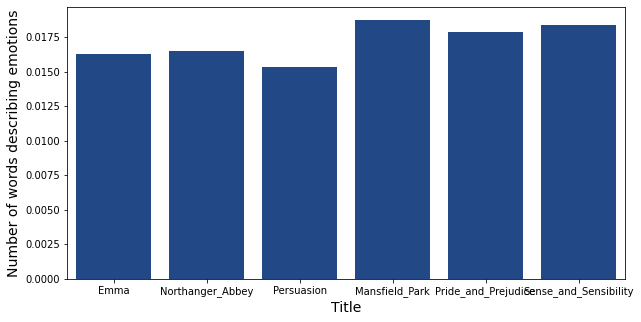

In [6]:
query = 'supersense_category == "verb.emotion" or supersense_category == "noun.feeling"'
label = 'Number of words describing emotions'

analyse_categories(query,label)

In [7]:
unique_words(query)



Emma

['cheer', 'humours', 'catch cold', 'willing', 'surprized', 'taken by', 'pushing', 'deference', 'panic', 'inviting', 'privileges', 'hospitality', 'drawn in', 'engrosses', 'meaning', 'refresh', 'thrown', 'wantonness', 'strikes', 'amuse away', 'disgraced', 'hesitating', 'killed', 'conceited', 'opposing', 'brace', 'surprize', 'blinds', 'satisfies', 'mischief', 'cast down', 'settled', 'endeared', 'inspiration', 'charade', 'tires', 'temptations', 'fidgetiness', 'whim', 'declined', 'palpitations', 'missing', 'feel cold', 'invites', 'perplexities', 'oddities', 'whims', 'caprices', 'charity', 'constitution', 'recover', 'elevate', 'struggles', 'mind!—look down', 'civility.—but', 'courtesy', 'stir out', 'resemble', 'connexions', 'intention', 'fainted', 'revive', 'catching cold', 'struck by', 'holding', 'wickedness', 'privations', 'hurting', 'loves piquet', 'observations', 'bewildered', 'exult', 'take cold', 'cold', 'mercy', 'lose', 'illnesses', 'cares!—and', 'contrast', 'violence', 'bashf

## Plants



Emma

shrubbery; flowers; tree; pollards; root; throat,—both; carrot; trunk; apple; trees; fruit; apples; laurels; flower; plants; olive; asparagus; elms; spruce; strawberries; trees;—and; wood;—and; orchard; blossom; clover; shrubs; 

Northanger_Abbey

rose; bush; flowers; trees; flower; trunk; roses; bloom; thorns; verdure; coppice; oak; oaks; forests; cedar; chestnut; hyacinths; woody; fruit; fruits; pinery; plants; Scotch firs; pine; shrubberies; apple; shrub; orchard; 

Persuasion

blossoms; groves; shrubberies; flower; trees; vine; tree; plants; grass; leaves; hedges; nut; bough; holly; varieties; forest; orchards; fruit; shrubbery; 

Mansfield_Park

gooseberry; flowers; shrubbery; plants; apricot; tree; fruit; trees; flower; grass; shrubs; foliage; roses; harvest; mahogany; planted; larch; laurel; beech; oak; heath; woods; leaves; geraniums; leaf; branches; evergreens; laurels; evergreen; yew; 

Pride_and_Prejudice

olive; pales; laurel; hedge; trees; meadows; coppice; oaks; S

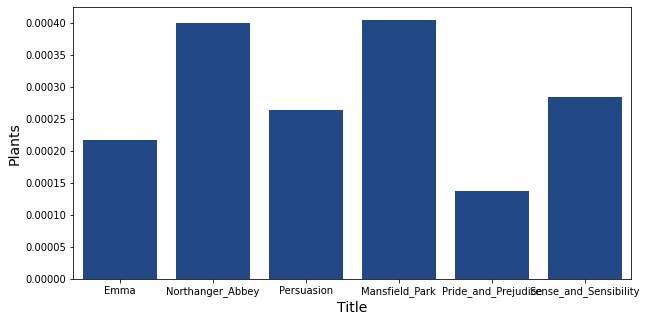

In [8]:
query = 'supersense_category == "noun.plant"'
label = 'Plants'

analyse_categories(query,label)

In [9]:
unique_words(query)



Emma

['pollards', 'root', 'throat,—both', 'carrot', 'apples', 'asparagus', 'elms', 'spruce', 'strawberries', 'trees;—and', 'wood;—and', 'blossom', 'clover']


Northanger_Abbey

['rose', 'bush', 'verdure', 'forests', 'cedar', 'chestnut', 'hyacinths', 'woody', 'pinery', 'scotch firs', 'pine', 'shrub']


Persuasion

['groves', 'vine', 'hedges', 'nut', 'bough', 'holly', 'varieties', 'forest', 'orchards']


Mansfield_Park

['gooseberry', 'foliage', 'harvest', 'mahogany', 'planted', 'larch', 'beech', 'woods', 'geraniums', 'branches', 'evergreens', 'evergreen']


Pride_and_Prejudice

['pales', 'hedge', 'meadows', 'spanish', 'chestnuts', 'grapes', 'nectarines']


Sense_and_Sensibility

['branch', 'honeysuckles', 'garden', 'dead leaves', 'plantations', 'moss', 'nettles', 'thistles', 'sweetmeats', 'mulberry tree', 'mulberry', 'green', 'walnut trees', 'fir', 'ash', 'acacia', 'poplars']


## Animals



Emma

horses; eggs; egg; cows; cow; goose; horseback; cockade; tittle; horse; mermaid; shark; sharks; boot; beet; porker; hind; human being; sheep; mule; cards; puppies; whist; pigeon; donkeys; donkey; hautboys; mare; fish; hazle; human; cattle; ox; dog; poultry; 

Northanger_Abbey

cricket; dolls; dormouse; canary; bird; hens; chickens; horseback; beetle; giant; feathers; lace; skeleton; horse; horses; animal; dogs; terriers; birds; fox; hounds; man; cattle; human creature; human being; fowl; game; Newfoundland; puppy; puppies; 

Persuasion

crow; horses; human creature; horse; dogs; foot; sheep; dog; nuts; nettles; weasel; sparrows; dab; chick; rat; 

Mansfield_Park

pug; horse; pony; horses; mare; poultry; hay; horseback; animal; cattle; oak; pheasants; fly; feet; starling; cows; eggs; creatures; hen; green; goose; geese; dogs; mouse; crowsfoot; pheasant; animals; turkey; ducks; drakes; mules; fox; queen; fan; negus; egg; human beings; litter; puppy; human; human being; 

Pride_an

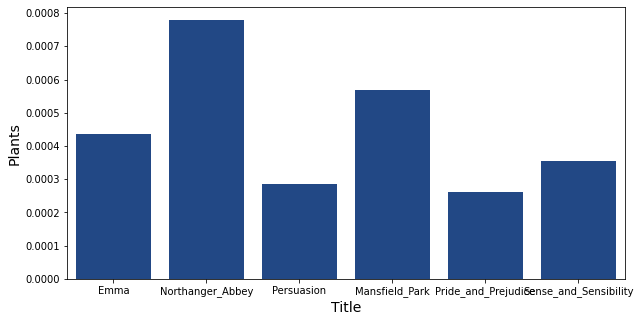

In [10]:
query = 'supersense_category == "noun.animal"'
label = 'Plants'

analyse_categories(query,label)

In [11]:
unique_words(query)



Emma

['cow', 'cockade', 'tittle', 'mermaid', 'shark', 'sharks', 'boot', 'beet', 'porker', 'hind', 'mule', 'cards', 'pigeon', 'donkeys', 'donkey', 'hautboys', 'hazle', 'ox']


Northanger_Abbey

['cricket', 'dolls', 'dormouse', 'canary', 'bird', 'chickens', 'beetle', 'giant', 'feathers', 'lace', 'skeleton', 'terriers', 'hounds', 'man', 'fowl', 'newfoundland']


Persuasion

['crow', 'foot', 'nuts', 'nettles', 'weasel', 'sparrows', 'dab', 'chick', 'rat']


Mansfield_Park

['pug', 'pony', 'hay', 'oak', 'pheasants', 'fly', 'feet', 'starling', 'creatures', 'hen', 'green', 'geese', 'mouse', 'crowsfoot', 'pheasant', 'animals', 'turkey', 'drakes', 'mules', 'queen', 'fan', 'negus', 'litter']


Pride_and_Prejudice

['foxhounds', 'ponies', 'female', 'men', 'pigs', 'bows', 'trout', 'haunch', 'partridges']


Sense_and_Sensibility

['barouches', 'females', 'mosquitoes', 'palanquins', 'monkey', 'bee', 'dove', 'beasts', 'cats', 'dairy']


## Cognition



Emma

remembrance; judgment; disposition; think; disadvantages; thought; think of; considering; recalled; devoted; powers; recollection; knowing; concerns; scheme; habits; mind; beloved; heart; talents; acquaintance; things; kind; suppose; thought of; know; doubt; slighted; opinion; ideas; connexions; sort; business; regard; believe; idea; knew; knows; hear; felt; thinks; forgotten; matter; proved; pass; manner; subject; believed; made up my mind; understand; endeavouring; known; depend upon; talent; matters; comprehend; thinks of; understanding; look about; leave; connexion; thing; will; regrets; considered; kindred; considerations; concern; realised; schemes; probability; proof; choose; chosen; assume; imagine; curiosity; attention; understood; included; heard; formed; sense; source; bear; hoped; regarded as; bias; inclination; taken; comprehended; cleverness; communications; principles; systems; accomplishments; reckoned; wonder; feel; anticipated; found; form; opinions; convictio

acquaintance; thought; education; choice; interest; principle; method; subject; thinking; matter; comprehended; bestowed; reflections; conceal; felt; concerns; think of; compared; think; debated; thought of; comprehend; notions; look to; know; means; thinking of; things; knew; idea; suppose; truth; impediment; plan; observe; consider; understand; regard; respect; bear; matters; settled; substituted; considered; scheme; resolved; intention; love; kind; views; inquiry; heard; considering; considerations; wish; see; expect; wait; hope; ignorance; opinions; trust; learn; difficulty; minds; consciousness; remember; expectations; point; choose; line of conduct; believed; trusting; seeing; part; confidence; take; supposed; left; sight; reconcile; understood; attended; meant; finding; learned; perceived; leave; astonished; expected; suspicion; surprised; puzzled; found; thoughts; depend upon; attention; sensibility; view; catch; schemes; endure; sort; life; feels; decided; opinion; abilities; 

truth; acknowledged; views; minds; considered; heard; know; thinking of; think of; consider; think; chooses; take; respect; mixture; parts; understand; mind; understanding; business; intended; forget; believe; opinion; find; depend on; times; circumspection; acquaintance; forms; laid; reflection; read; knew; adjusting; ideas; hear; known; expected; choose; skill; intelligence; whole; meant; heart; wish; idea; hearing; attention; discovered; compared; character; decided; see; beheld; advice; distinguished; learnt; found; curiosity; thought; branch; subject; fancy; expect; seeing; sense; calculated; judgment; chose; habit; memories; choice; regard; reliance; interest; established as; felt; denominated; kind; self - command; suppose; opinions; point; purpose; mistake; guess; reflections; self; score; things; form; admire; leave; discover; Remember; endeavor; sees; plan; remember; characteristic; imagine; unfolded; studying; matter; suspecting; feature; rendered; eye; caught; intention; ac

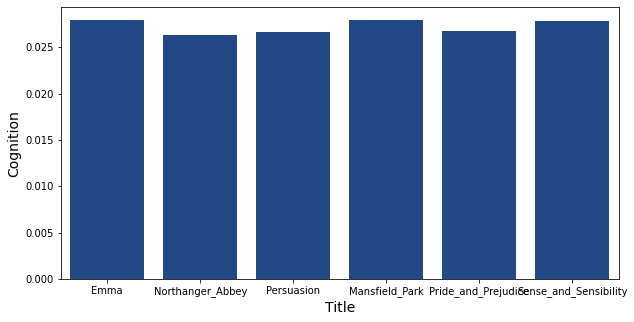

In [12]:
query = 'supersense_category == "verb.cognition" or supersense_category == "noun.cognition"'
label = 'Cognition'

analyse_categories(query,label)

In [13]:
unique_words(query)



Emma

['disposition', 'disadvantages', 'beloved', 'slighted', 'look about', 'connexion', 'kindred', 'inclination for', 'appreciating', 'basis', 'specimens', 'likes', 'copying', 'merit', 'drew up', 'made out', 'surprized', 'following up', 'decision', 'deceived', 'wanted,”—observed', 'hesitate', 'surmised', 'nature', 'bestow', 'crossed', 'ambition', 'bewitches', 'tolerate', 'allowance', 'written out', 'intellects', 'looking at', 'pondered', 'courts', 'souls', 'take after', 'occupations', 'topics', 'protracted', 'schemed', 'inherited', 'endured', 'looks', 'succeeded', 'met', 'rumination', 'conceptions', 'vision', 'chuse', 'me!—what', 'deem', 'gratifications', 'reviving', 'lay down', 'know?—had', 'interpret', 'error', 'sought', 'dangers', 'misinterpreted', 'cogitation', 'set about', 'use!—nobody', 'looking up', 'idea of', 'pore over', 'prefers', 'agrees', 'engrafted', 'took notice', 'culture', 'powers of mind', 'catch at', 'examination', 'took in', 'shew off', 'delineated', 'heritage', '

['good opinion', 'attractions', 'restriction', 'give', 'doctrine', 'militated', 'distrusts', 'disregarded', 'endeavoring', 'place inquiry', 'recurred to', 'screened', 'delighted', 'esteems', 'miracle', 'abhor', 'styled', 'idolized', 'speaks', 'remembers', 'breeding', 'marking', 'contrives', 'define', 'intends', 'draw on', 'thought over', 'make up', 'prescience', 'partook', 'exercised', 'backwardness', 'look out for', 'inadvertence', 'uniformly', 'screen', 'carrying', 'reminded of', 'laid out', 'originated', 'inspiring', 'pretends', 'defined', 'engross', 'expects', 'establishing', 'declares', 'gathered', 'brought forward', 'inquisitiveness', 'pretend', 'mental', 'disbelief', 'divine', 'detecting', 'foundation', 'set aside', 'illusion', 'entrusted', 'informed', 'mistrust', 'ability', 'relieve', 'deprive', 'trust to', 'self - interest', 'reconciled', 'held her tongue', 'open', 'sentiment', 'talked', 'bringing', 'delayed', 'premeditated', 'soul', 'identify', 'relying', 'tending', 'watching

## Phenomenon



Emma

moonlight; rain; weather; effect; result; consequence; fortune; effects; air; consequences; Weather; wind; storm; snow; thing; attraction; candlelight; change; bad weather; sun; smoke; heat; cloud; 

Northanger_Abbey

effect; fortune; weather; result; consequence; rain; sunshine; gust; wind; consequences; embers; storm; breeze; tempest; light; rays; fading light; bad weather; 

Persuasion

consequence; change; weather; effect; connexions; results; luck; gale; effects; fortune; breeze; wind; rain; result; winds; consequences; sun; sunshine; 

Mansfield_Park

result; consequences; effects; consequence; effect; weather; moonlight; air; heat; wind; mist; sunshine; breeze; candlelight; current; rain; gust; strain; winds; connexions; fortune; snow; connexion; light; good luck; rays; blaze; change; 

Pride_and_Prejudice

tide; rain; weather; result; consequence; effect; effects; scenes; fortune; wind; change; consequences; storm; 

Sense_and_Sensibility

result; consequence; effect; w

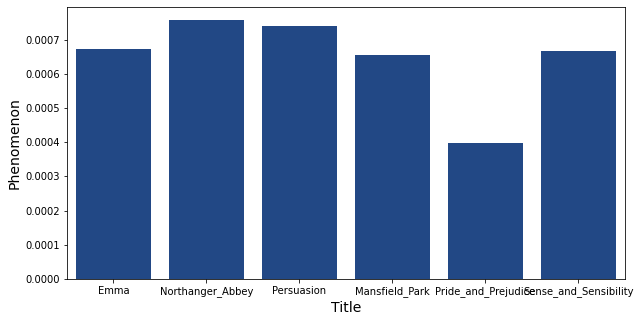

In [14]:
query = 'supersense_category == "noun.phenomenon"'
label = 'Phenomenon'

analyse_categories(query,label)

In [15]:
unique_words(query)



Emma

['thing', 'attraction', 'smoke']


Northanger_Abbey

['embers', 'tempest', 'fading light']


Persuasion

['results', 'luck', 'gale']


Mansfield_Park

['mist', 'current', 'strain', 'connexion', 'good luck', 'blaze']


Pride_and_Prejudice

['tide', 'scenes']


Sense_and_Sensibility

['nature', 'fair weather', 'open weather', 'death', 'chance']


In [41]:
query = 'supersense_category == "verb.communication" or supersense_category == "noun.communication"'
unique_words(query)



Emma

['caresses', 'curtseys', 'asks', 'leave off', 'smoothed', 'embodied', 'ceasing', 'prosings', 'talkativeness', 'talks of', 'book”—was', 'good -', 'ingratiating', 'fixed on', 'surprize', 'stimulate', 'that,”—said', 'outcry', 'attractions', 'likeness', 'naïveté', 'likenesses', 'sit', 'raptures', 'portfolio', 'crayon', 'take', 'forswear', 'stationing', 'memorial', 'defended', 'framed', 'commissions', 'assurances,—and', 'demurs', 'wording', 'contemplating', 'run away', 'allow for', 'tattle', 'so!—then', 'giggle', 'offer of', 'answer!—nothing', 'answer!—you', 'education', 'waiving', 'abusing', 'restoratives', 'pleading', 'riddles', 'ciphers', 'putting in', 'spoken to', 'riddle', 'contribute', 'enigmas', 'conundrums', 'puzzles', 'recited', 'charade', 'transcribed', 'pomp', 'beam', 'break off', 'courtship', 'reverse', 'compliment!—and', 'spoke for', 'prologue', 'texts', 'preached', 'think!—the', 'charades', 'leave out', 'couplet', 'writing down', 'declaration of', 'refine', 'affix', 'a

['give over', 'preference', 'circulation', 'stand up', 'censuring', 'design,--to', 'associating', 'endeared', 'formality', 'mortified', 'said,--', 'teasing', 'strictures', 'connections', 'read,--', 'extort', 'prognostics', 'hear', 'withheld', 'testified', 'added,--', 'languages', 'undervaluing', 'captivation', 'comply', 'reminded', 'calling off', 'lot', 'converting', 'opinions', 'appear', 'appertain', 'expostulation', 'disputes', 'negatived', 'despising', 'holding', 'compass', 'answered,--', 'petition', 'disappointing', 'intruding', 'extracts', 'rail', 'discourage', 'apologizing', 'seated', 'elevated', 'condescends', 'gaped', 'treasured up', 'folios', 'assents', 'seconding', 'resented', 'digressions', 'legal redress', 'cried up', 'saying,--', 'tickets', 'enumerating', 'rebuke', 'smile,--', 'injury', 'surmount', 'oddities', 'cautioning', 'handed down', 'éclat', 'overspread', 'insure', 'illustration', 'shake off', 'suspend', 'sneer', 'dictates', 'advances', 'prefaced', 'sharing', 'exhibi

In [42]:
all_rows = []

for text in texts:
    row = []
    
    print(f'{text}')
    row.append(text)
    row.append(tokens_novels[text])
    data = pd.read_csv( join('Data',f'{text.lower()}.supersense'),sep = '\t')
    count_categories = Counter(data['supersense_category'].tolist())
    for category in all_categories.keys():
        row.append(count_categories.get(category)/tokens_novels[text])
    all_rows.append(row)

    
df = pd.DataFrame(all_rows, columns = ['title','nr_tokens'] + list(all_categories.keys()) )
    

Emma
Northanger_Abbey
Persuasion
Mansfield_Park
Pride_and_Prejudice
Sense_and_Sensibility


In [43]:
df

,title,nr_tokens,noun.person,noun.artifact,noun.attribute,verb.perception,verb.contact,noun.state,verb.stative,noun.time,...,noun.relation,noun.animal,noun.phenomenon,noun.process,verb.weather,noun.Tops,noun.substance,noun.motive,noun.plant,noun.shape
0,Emma,188599,0.041156,0.006516,0.009756,0.007985,0.002678,0.007540,0.032519,0.008372,...,0.000626,0.000435,0.000673,0.000080,0.000058,0.000917,0.000520,0.000286,0.000217,0.000037
1,Northanger_Abbey,92417,0.036898,0.013894,0.009695,0.008213,0.003246,0.006720,0.028880,0.009619,...,0.000855,0.000779,0.000757,0.000054,0.000151,0.000995,0.000855,0.000227,0.000400,0.000065
2,Persuasion,98506,0.045094,0.007685,0.010649,0.008609,0.002731,0.008304,0.030435,0.009827,...,0.000741,0.000284,0.000741,0.000112,0.000102,0.001259,0.000355,0.000305,0.000264,0.000061
3,Mansfield_Park,187838,0.040743,0.008651,0.011467,0.007938,0.002933,0.008097,0.031288,0.008704,...,0.000958,0.000570,0.000655,0.000053,0.000016,0.001086,0.000522,0.000362,0.000405,0.000043
4,Pride_and_Prejudice,145336,0.044476,0.006977,0.011195,0.007851,0.002195,0.007183,0.028885,0.008071,...,0.000750,0.000261,0.000399,0.000014,0.000041,0.001149,0.000220,0.000461,0.000138,0.000014
5,Sense_and_Sensibility,140801,0.041342,0.007720,0.011001,0.007578,0.002699,0.008608,0.029368,0.008828,...,0.000838,0.000355,0.000668,0.000078,0.000021,0.001094,0.000376,0.000533,0.000284,0.000007


noun.person


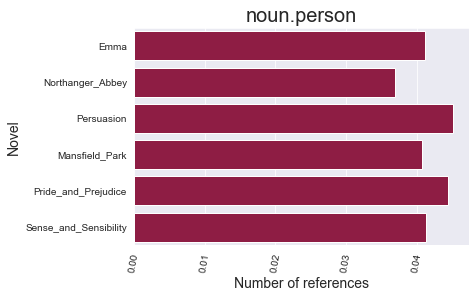

noun.artifact


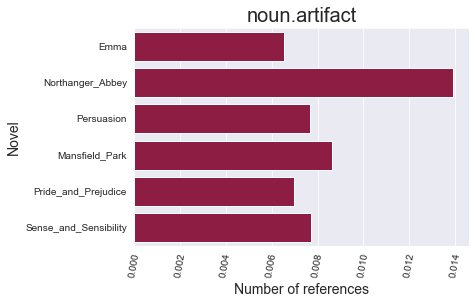

noun.attribute


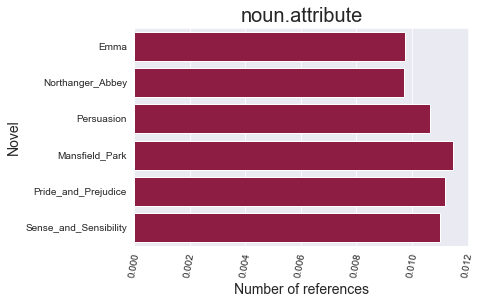

verb.perception


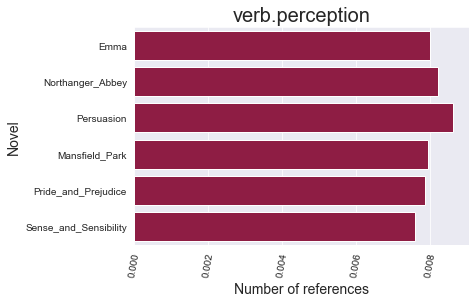

verb.contact


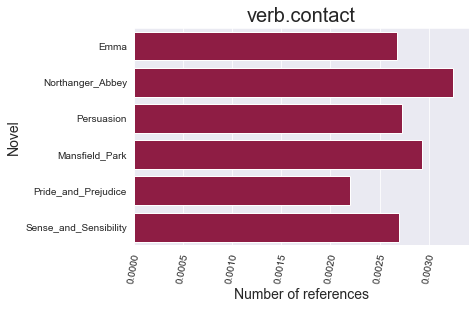

noun.state


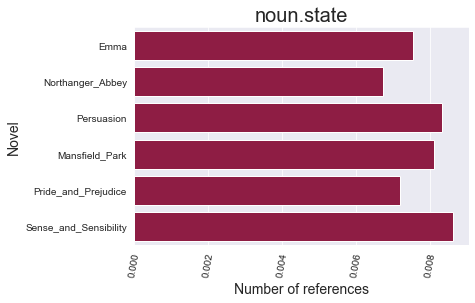

verb.stative


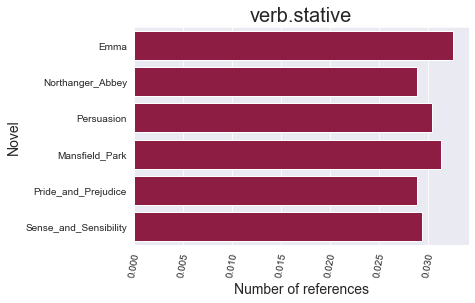

noun.time


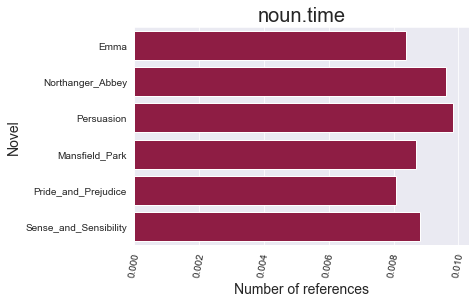

noun.object


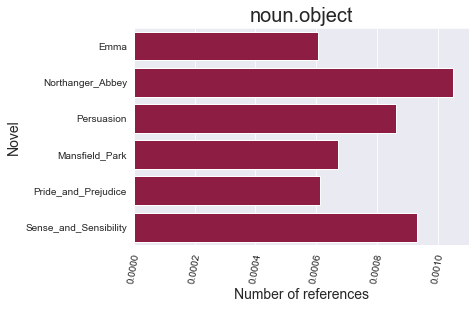

verb.emotion


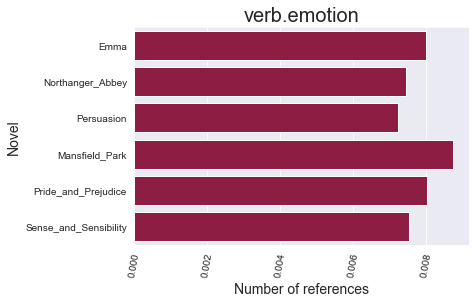

verb.change


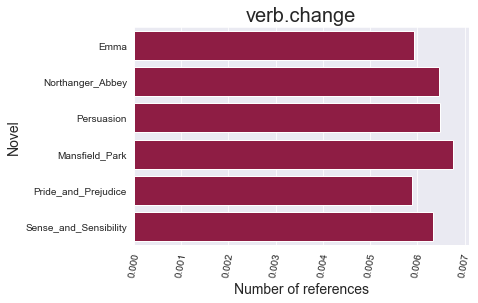

verb.possession


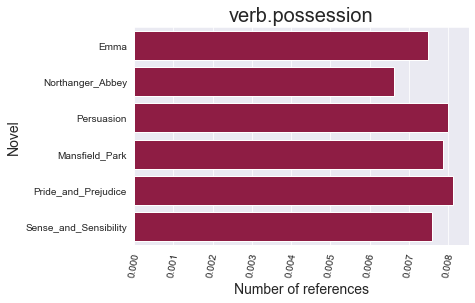

noun.cognition


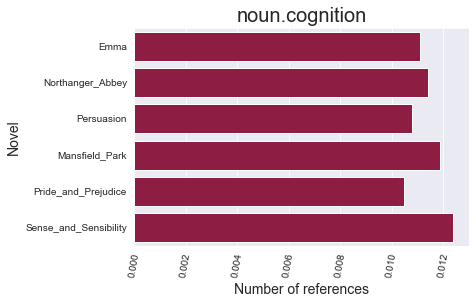

noun.communication


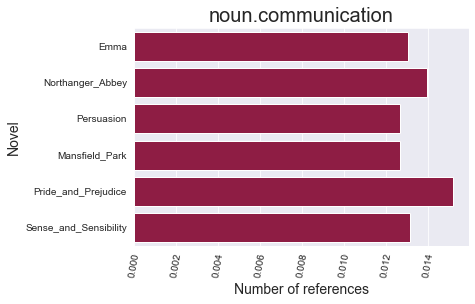

noun.act


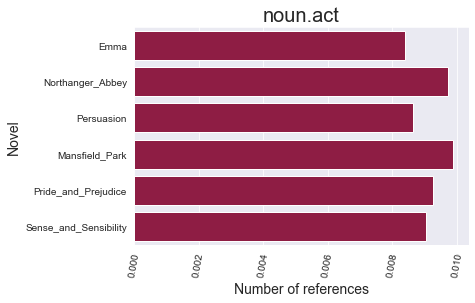

noun.feeling


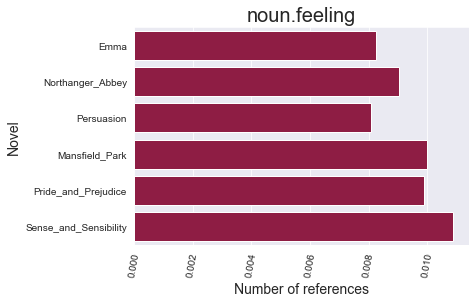

noun.group


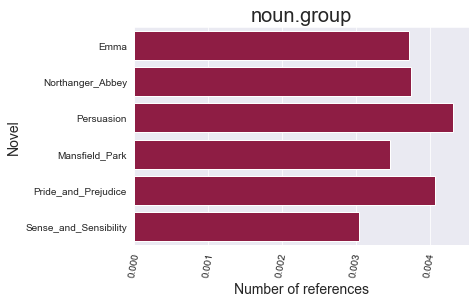

verb.social


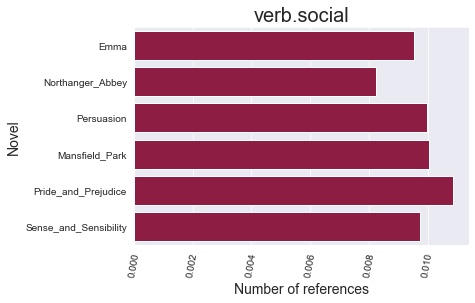

verb.competition


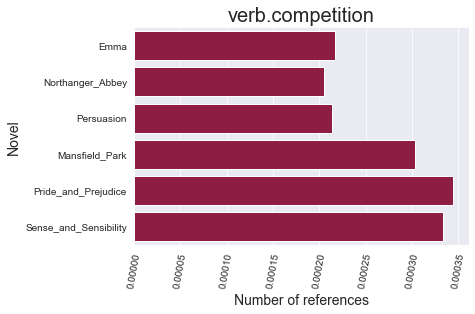

verb.cognition


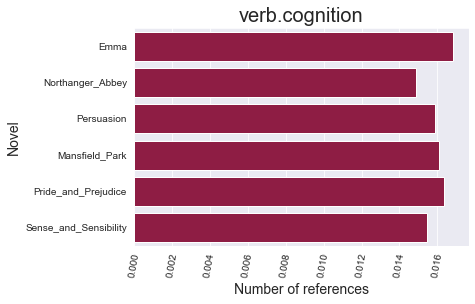

noun.possession


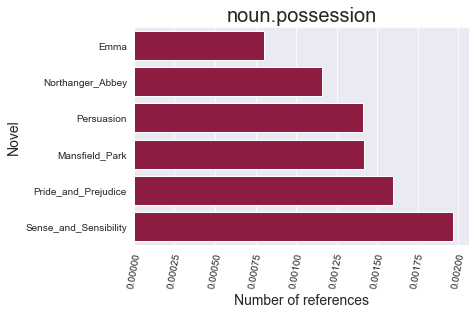

verb.creation


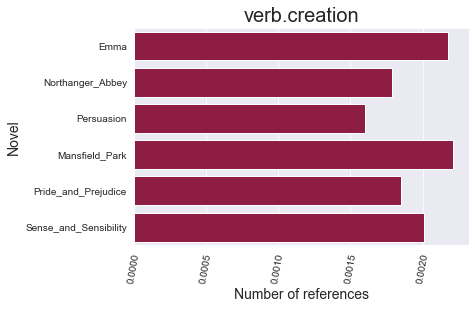

noun.event


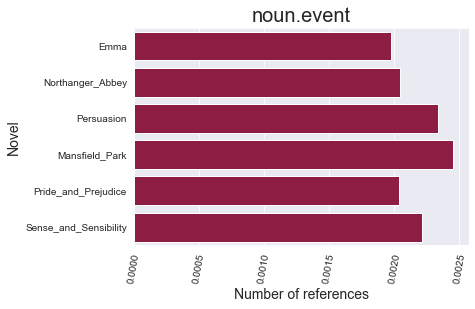

verb.body


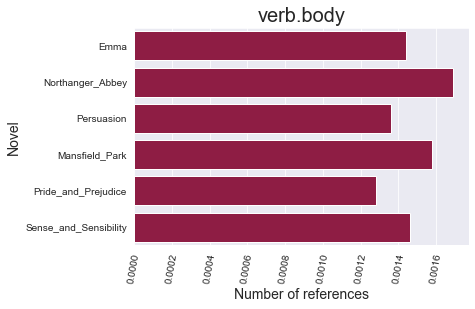

verb.motion


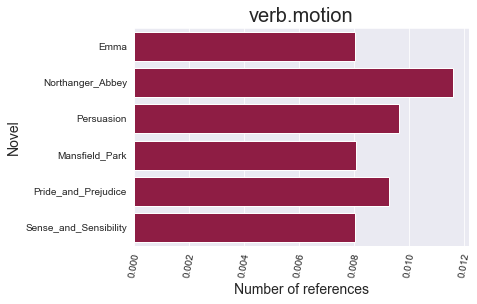

noun.food


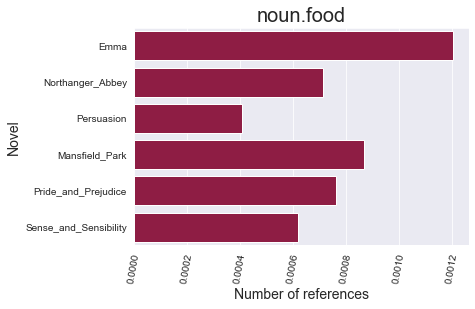

verb.communication


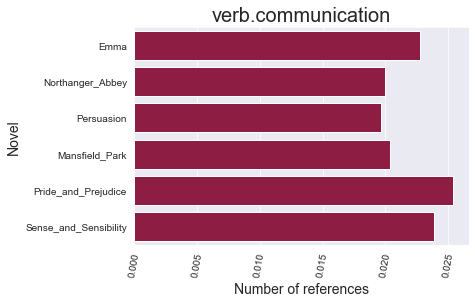

verb.consumption


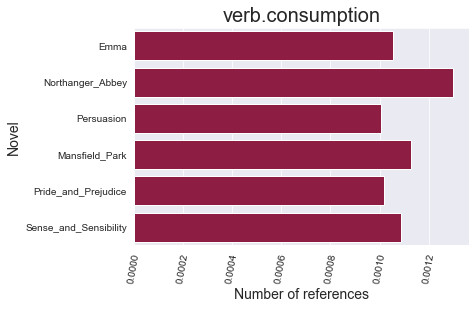

noun.quantity


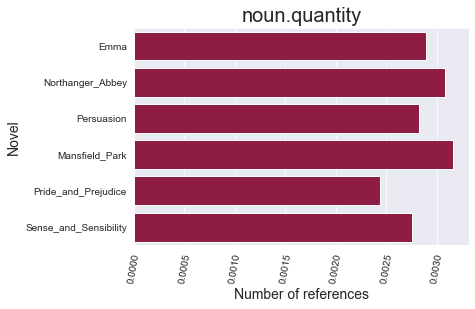

noun.body


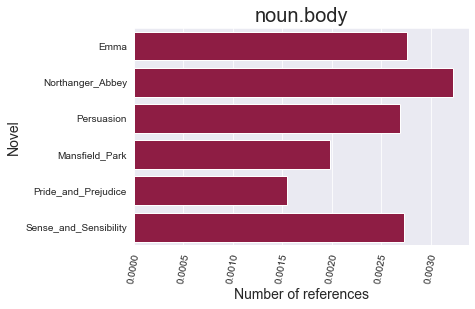

noun.location


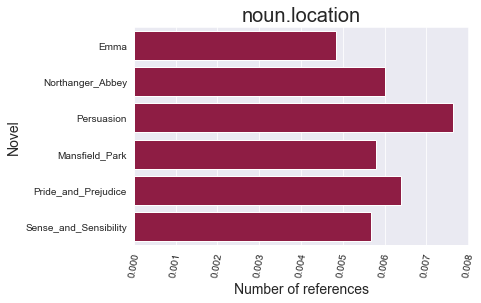

noun.relation


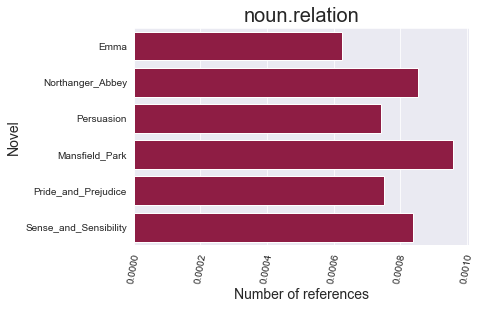

noun.animal


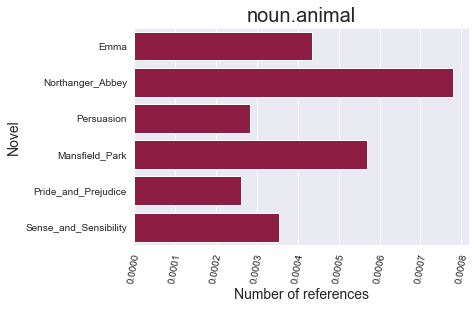

noun.phenomenon


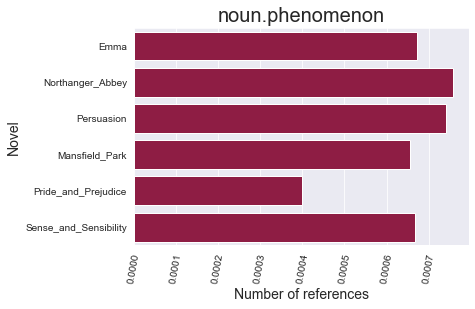

noun.process


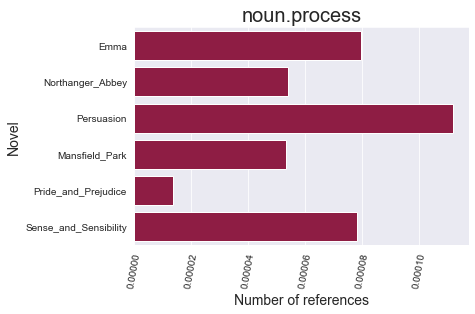

verb.weather


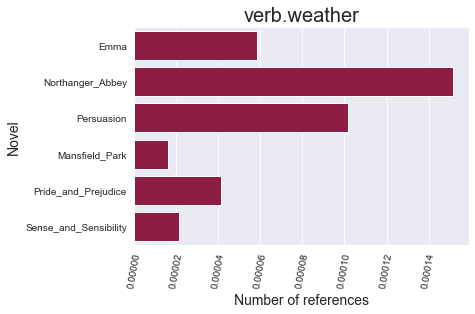

noun.Tops


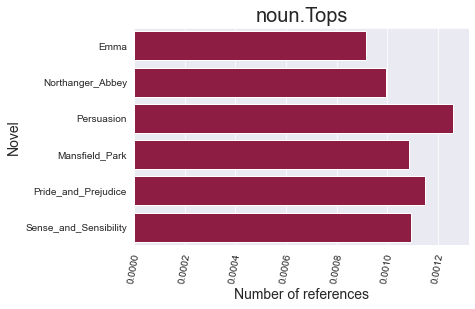

noun.substance


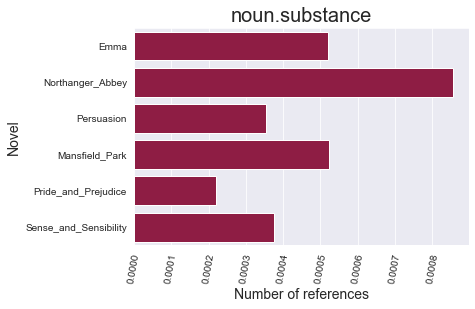

noun.motive


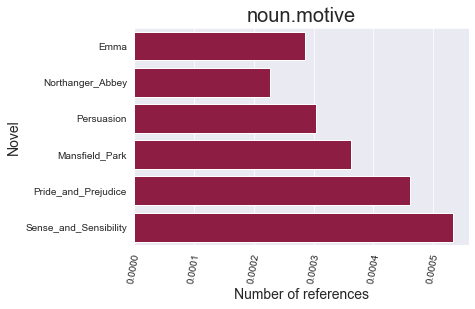

noun.plant


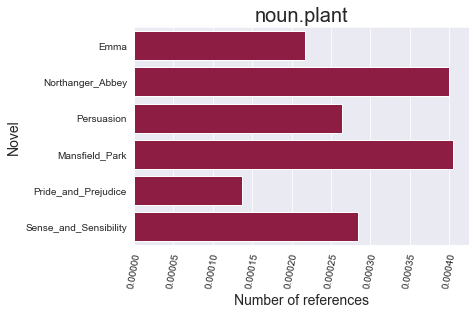

noun.shape


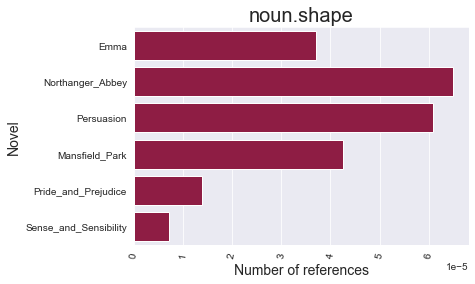

In [44]:
sns.set_style("darkgrid")

all_categories_list = list(all_categories.keys())



for category in all_categories_list:
    print(category)
    y_axis = df['title']
    x_axis = df[category]
    
    #fig = plt.figure( figsize=( 6 , 25 ) )


    graph = sns.barplot( x=x_axis, y=y_axis, 
                        dodge=False , color = '#a10a3e' )

    graph.set_title( category , size = 20) 
    graph.set_ylabel('Novel' , size = 14) 
    graph.set_xlabel( 'Number of references' , size = 14 )

    plt.xticks(rotation= 80)
    # The next line places the legend outside out the plot

    plt.show()
    
    



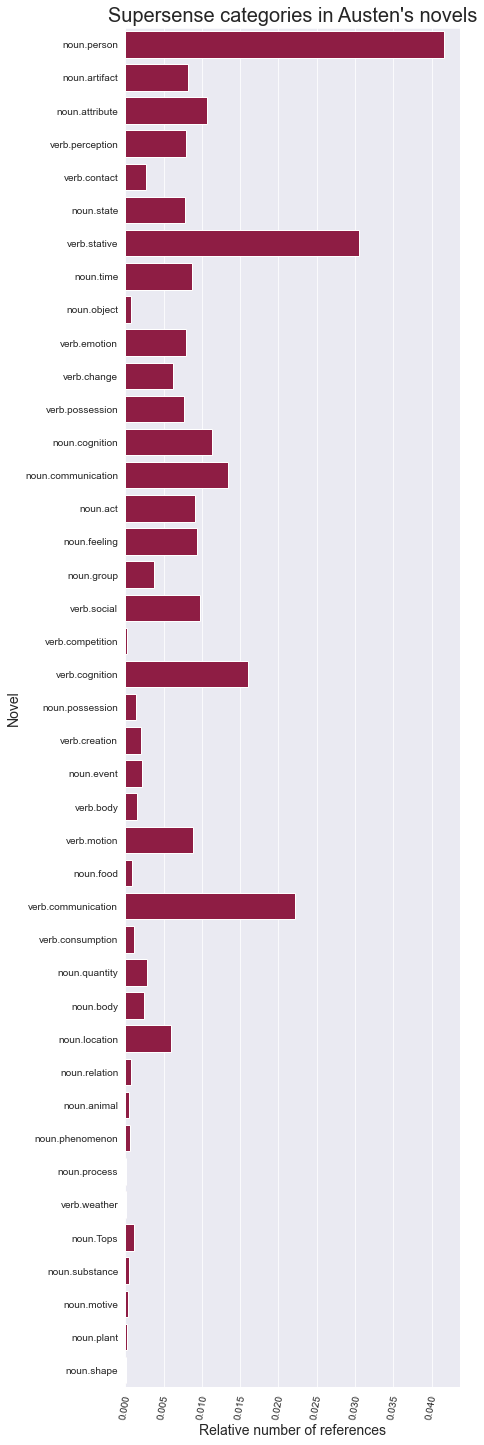

In [59]:
sns.set_style("darkgrid")

for category in all_categories_list:
    df[f'{category}_absolute'] = df[category] * df['nr_tokens']
    
df_sum = df.sum()

y_axis = all_categories_list
x_axis = []

for category in all_categories_list:
    x_axis.append( df_sum[f'{category}_absolute'] / df_sum['nr_tokens'] )
    

fig = plt.figure( figsize=( 6 , 25 ) )


graph = sns.barplot( x=x_axis, y=y_axis, 
                    dodge=False , color = '#a10a3e' )

graph.set_title('Supersense categories in Austen\'s novels' , size = 20) 
graph.set_ylabel('Novel' , size = 14) 
graph.set_xlabel('Relative number of references' , size = 14 )

plt.xticks(rotation= 80)
# The next line places the legend outside out the plot

plt.show()